<a href="https://colab.research.google.com/github/Maksim2809/Old_HomeWork_Numerical_Methods/blob/main/HomeWork6_(%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_c_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%B0_%D0%B8_KDE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import statsmodels as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error as mse, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as itr

from sklearn.metrics import roc_auc_score as rocauc
from sklearn.linear_model import LogisticRegression , Ridge, Lasso,ElasticNet

import math

import matplotlib.pyplot as plt

In [ ]:
df_itog = pd.DataFrame({})

def f(x):
    return np.sin(x)*np.log(1+x**2)

In [ ]:
!pip install scikit-fda

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import gc
import skfda
from skfda import FDataGrid
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
from skfda.preprocessing.smoothing import KernelSmoother

In [ ]:
# Объём выборки
N  = 50

# ско шума
s2 = 0.5

# P = 10

# переменная
X = np.sort(np.random.uniform(low = -math.pi, high = math.pi, size = N))

# шум
E = np.random.normal(0,s2,N)

# тренд
Y = f(X)+E

[]

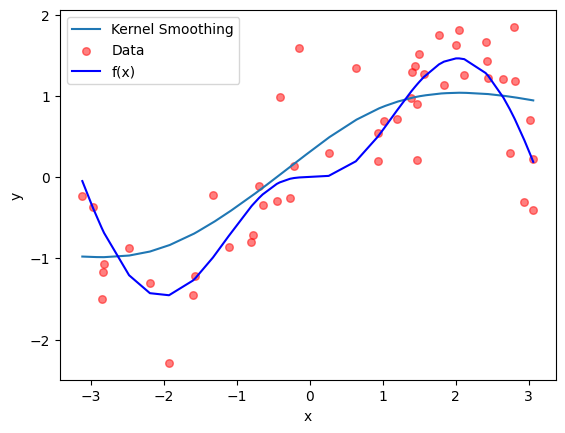

In [ ]:
y_fd = FDataGrid(Y[np.newaxis,:], X)
kernel_estimator = NadarayaWatsonHatMatrix(bandwidth=1.0)

# Создание сглаживающего ядра
ks = KernelSmoother(kernel_estimator)
y_fd_smooth = ks.fit_transform(y_fd)

# График оценки плотности ядра
y_fd_smooth.plot(label='Kernel Smoothing')
plt.scatter(X, Y, color='red', s=30, alpha=0.5, label='Data')
plt.plot(X,f(X),color = 'b',label = 'f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


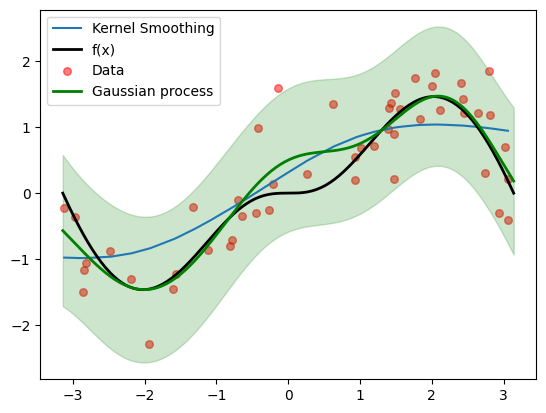

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# # Оцениваем функцию с помощью метода сглаживания ядра
# kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X[:, np.newaxis])
# x_plot = np.linspace(0, 4*np.pi, 50)
# log_dens = kde.score_samples(x_plot[:, np.newaxis])
# # log_dens = kde.sample(50)
# y_kde = np.exp(log_dens)

x_plot = np.linspace(-math.pi,math.pi, 200)

# Оцениваем функцию с помощью регрессии гауссовского процесса
kernel = RBF(length_scale=100, length_scale_bounds=(1, 200)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0).fit(X[:, np.newaxis], Y)
y_gpr, std = gpr.predict(x_plot[:, np.newaxis], return_std=True)
# Рисуем график с точками данных, исходной функцией и прогнозами наилучших моделей
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(x_plot, f(x_plot), color='black', lw=2, label='f(x)')
# ax.scatter(X, Y, color='red', s=30, alpha=0.5, label='Data')
# # ax.plot(x_plot, y_kde, color='blue', lw=2, label='Kernel density')
# ax.plot(y_fd_smooth, color='blue', lw=2, label='Kernel density')
# # ax.plot(y_fd_smooth, color='black', lw=2, label='Kernel density_2.0')
# ax.plot(x_plot, y_gpr, color='green', lw=2, label='Gaussian process')
# ax.fill_between(x_plot, y_gpr - 2 * std, y_gpr + 2 * std, color='green', alpha=0.2)
# ax.legend(loc='best')

y_fd_smooth.plot(label='Kernel Smoothing')
plt.plot(x_plot, f(x_plot), color='black', lw=2, label='f(x)')
plt.scatter(X, Y, color='red', s=30, alpha=0.5, label='Data')
# ax.plot(x_plot, y_kde, color='blue', lw=2, label='Kernel density')
# plt.plot(y_fd_smooth, color='blue', lw=2, label='Kernel density')
# ax.plot(y_fd_smooth, color='black', lw=2, label='Kernel density_2.0')
plt.plot(x_plot, y_gpr, color='green', lw=2, label='Gaussian process')
plt.fill_between(x_plot, y_gpr - 2 * std, y_gpr + 2 * std, color='green', alpha=0.2)
plt.legend(loc='best')

plt.show()